In [1]:
import pathlib
import matplotlib as mpl
import pandas as pd
import scanpy as sc
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

sns.set_style("ticks")

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.2,
    "transparent": True,
}

mpl.rc("savefig", dpi=300)
output_dir = "/home/michaelswift/repos/tabula-bursa/analysis/figures/figure2ED"

pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
sc.settings.figdir = output_dir
output_suffix = ""
output_formats = [".png", ".svg", ".pdf"]

def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)
%run ../helper.py

## Load the Data

In [2]:
celltype_file = "bcells"
celltypes = ['Plasma cells', 'Plasmablasts', 'Memory B cells']

In [3]:
adata = sc.read_h5ad(
    f"../../../data/{celltype_file}.h5ad.gz", backed = 'r'
)

In [4]:
nb = adata[~adata.obs.celltypist.isin(celltypes)]

In [5]:
adata = nb.to_memory()

In [6]:
adata = adata[adata.obs.probable_hq_single_b_cell == "True"]

In [7]:
adata.obs['hypermutated'] = adata.obs.v_mismatch > 3

/tmp/ipykernel_10446/1408960596.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['hypermutated'] = adata.obs.v_mismatch > 3


In [8]:
adata.obs.hypermutated = adata.obs.hypermutated.astype('category')

In [9]:
sc.tl.rank_genes_groups(adata, groupby='hypermutated')

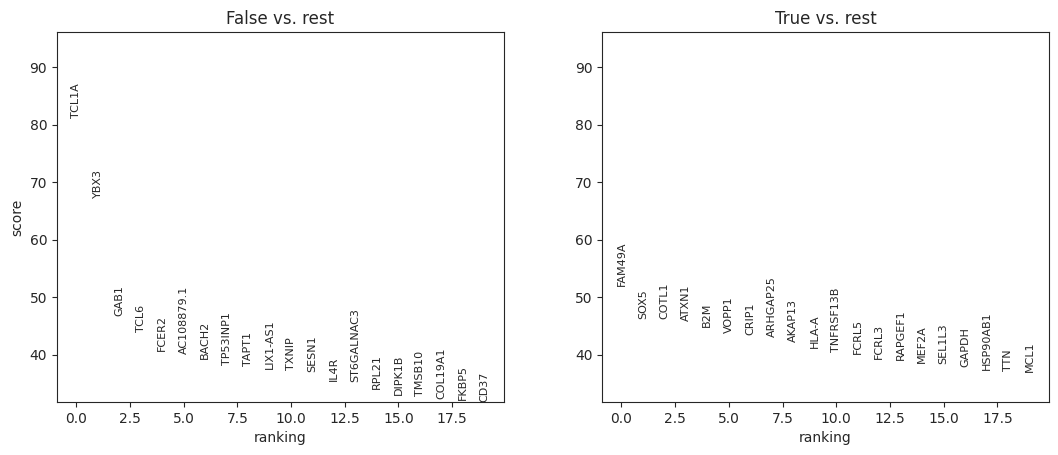

In [10]:
sc.pl.rank_genes_groups(adata)

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/michaelswift/miniconda3/envs/scanpy_new/li

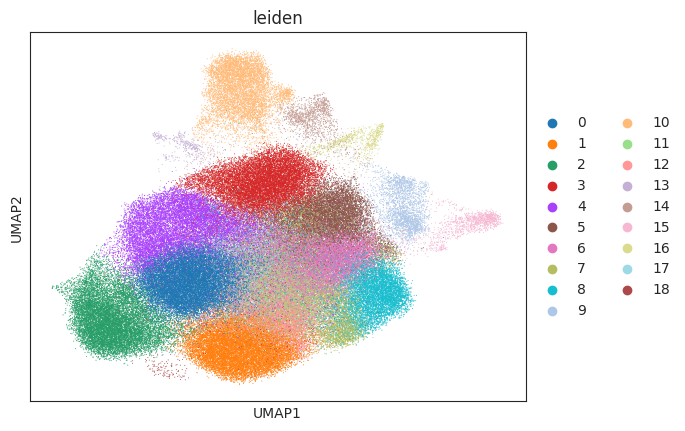

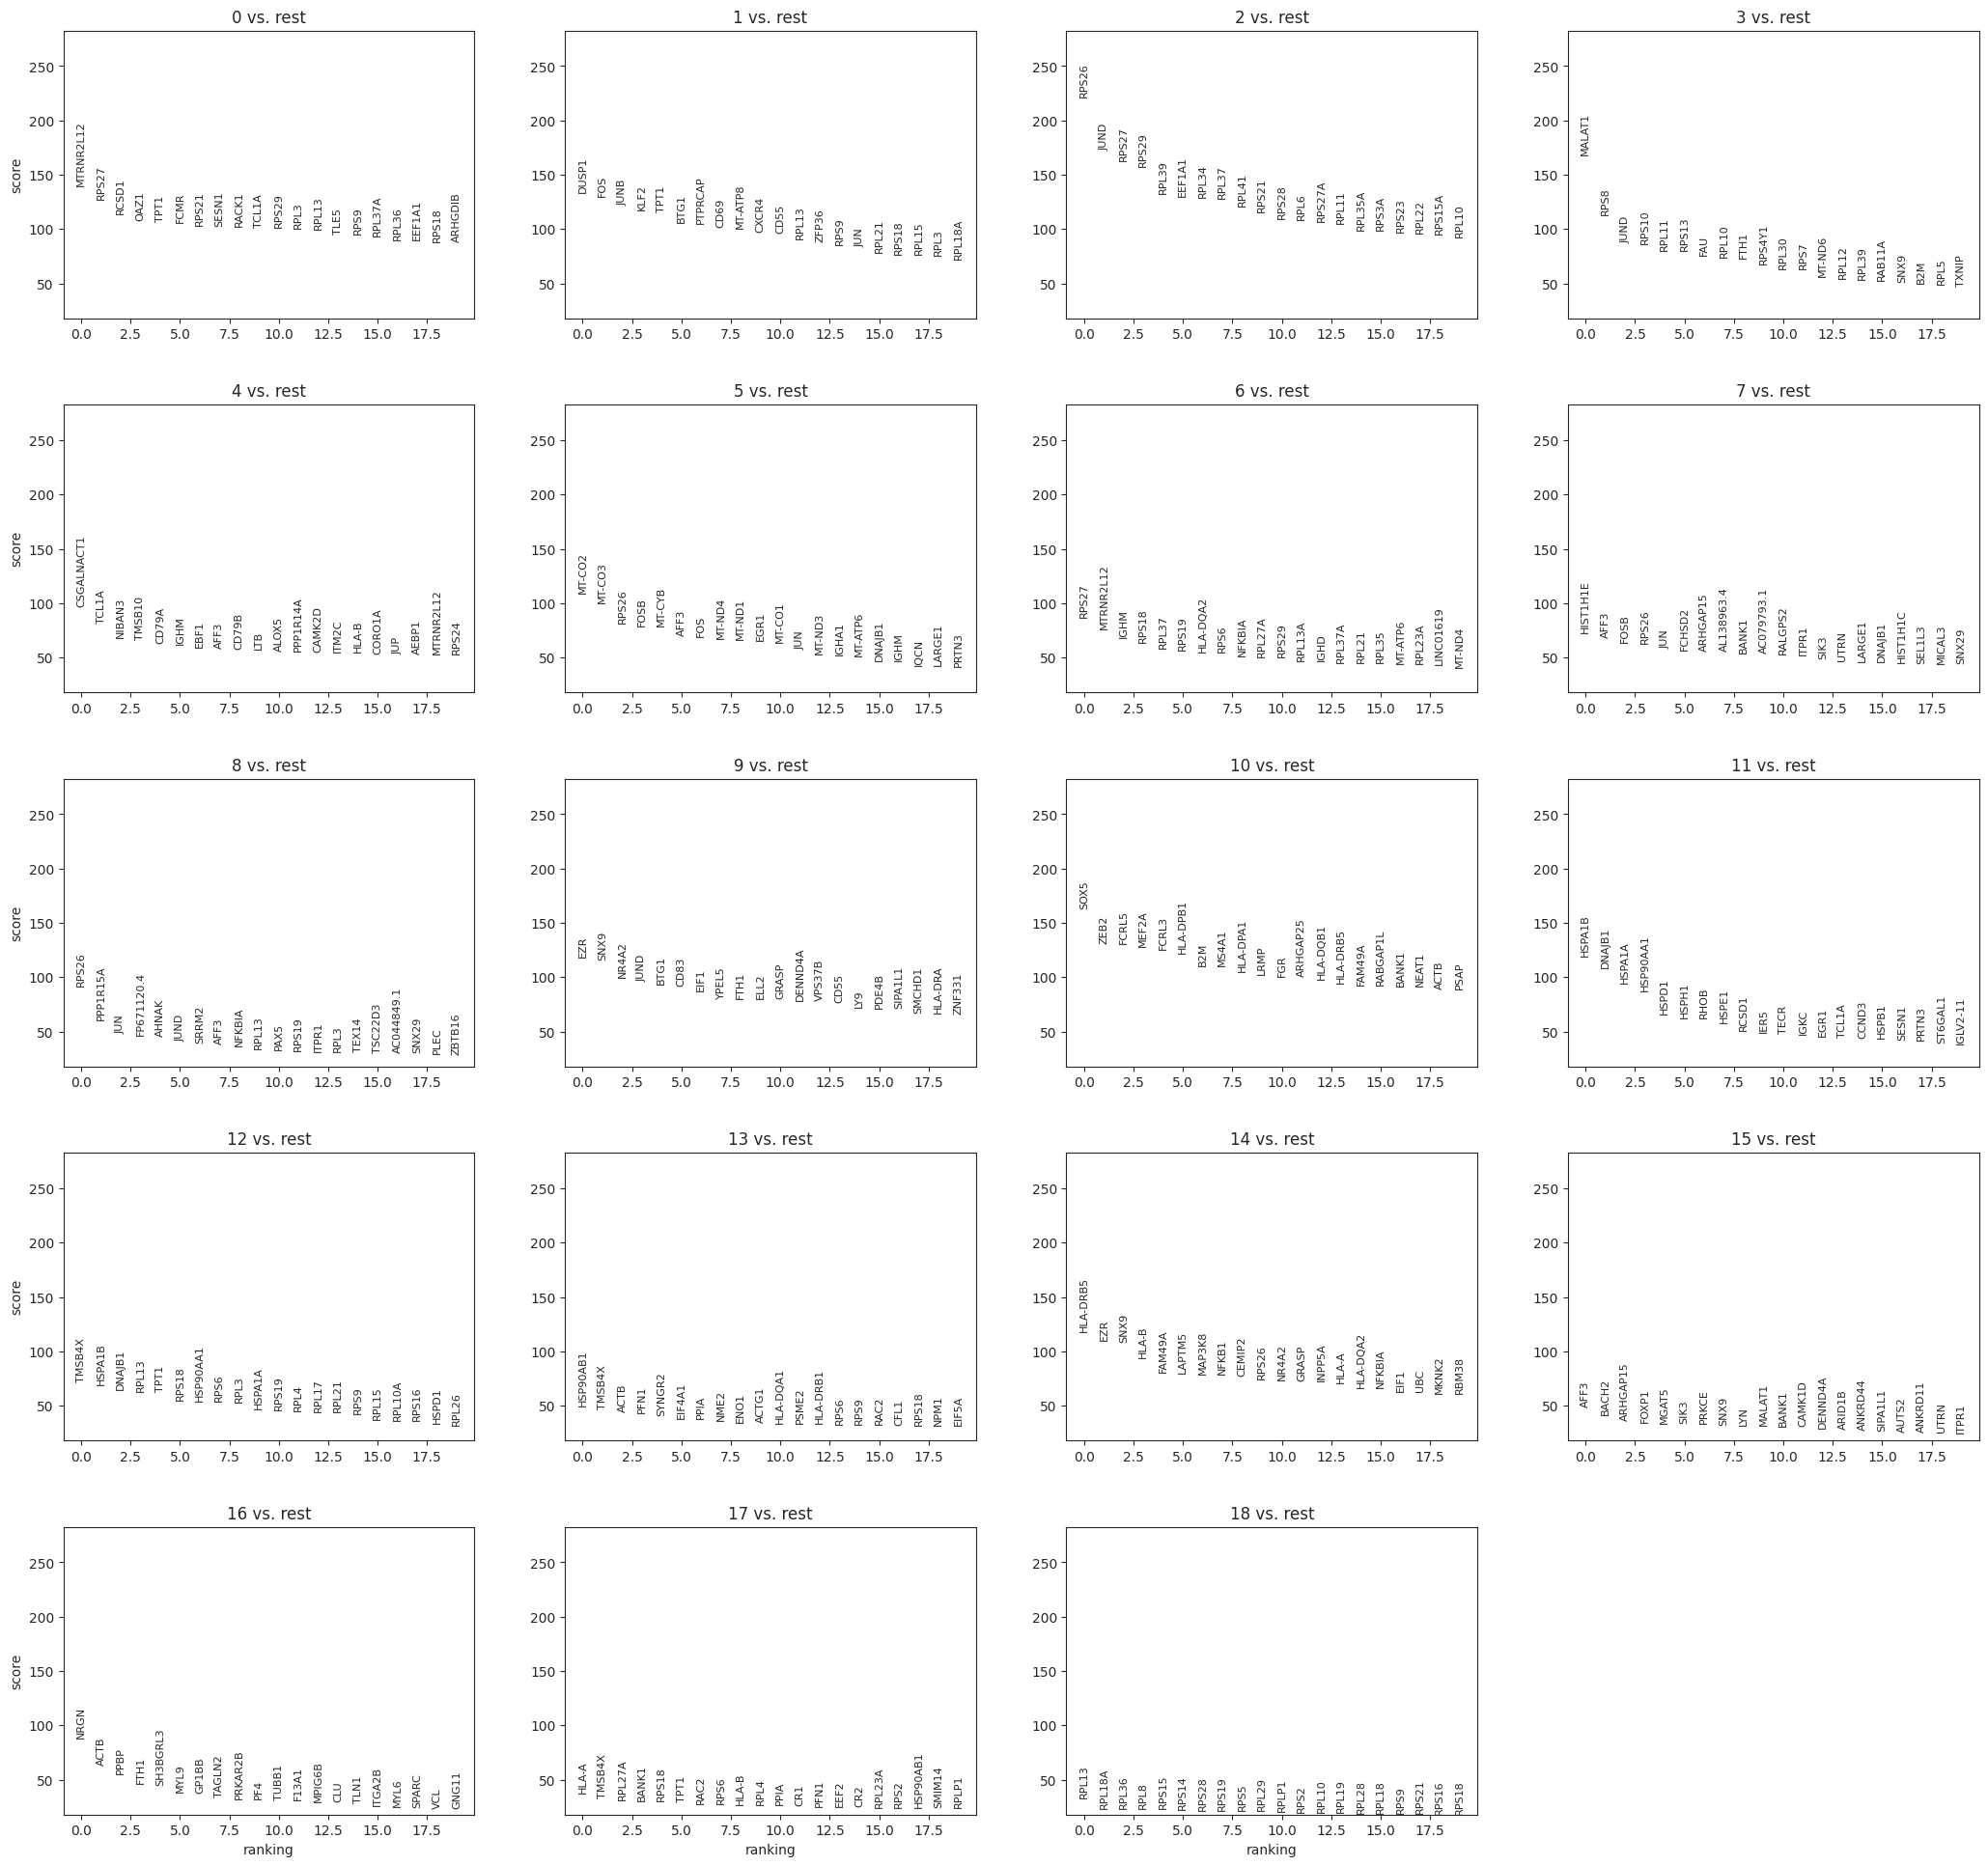

In [11]:
sc.pp.neighbors(adata, use_rep="X_scVI_all", n_neighbors=20)
sc.tl.umap(
    adata,
)
sc.tl.leiden(adata, resolution = 1.5)
sc.pl.umap(adata, color = 'leiden', size = 2)
sc.tl.rank_genes_groups(adata, groupby="leiden")
sc.pl.rank_genes_groups(adata)

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


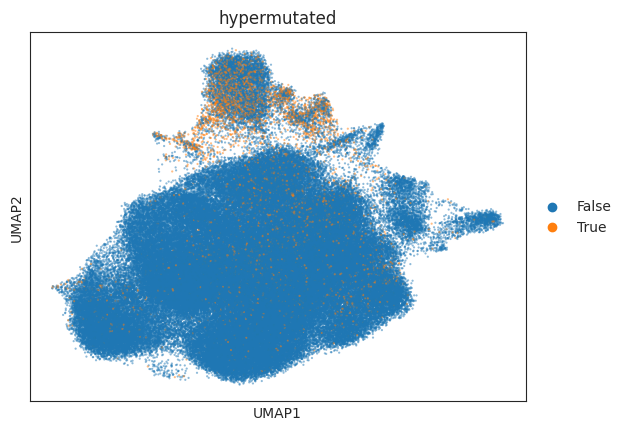

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


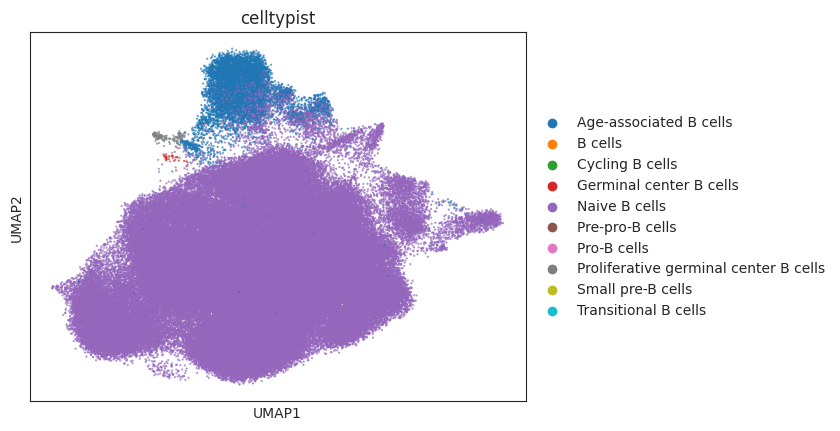

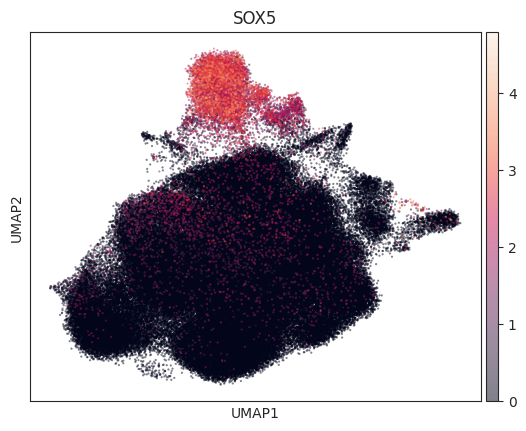

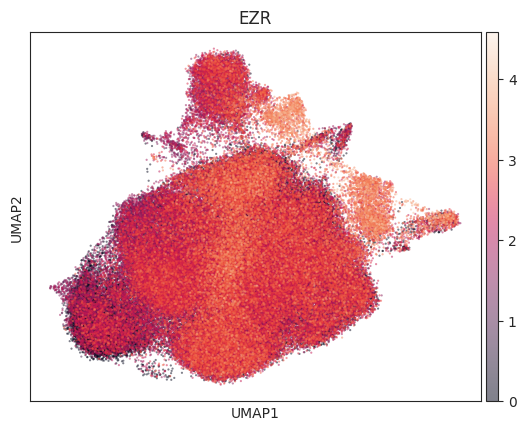

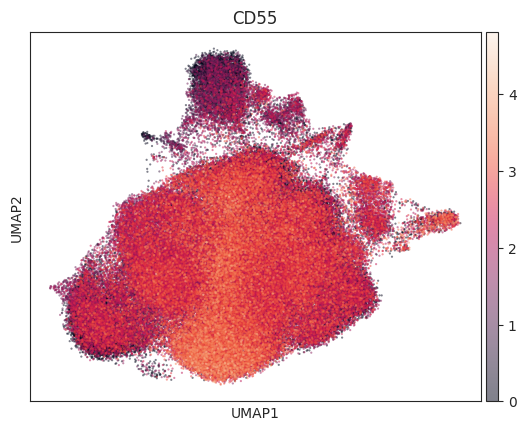

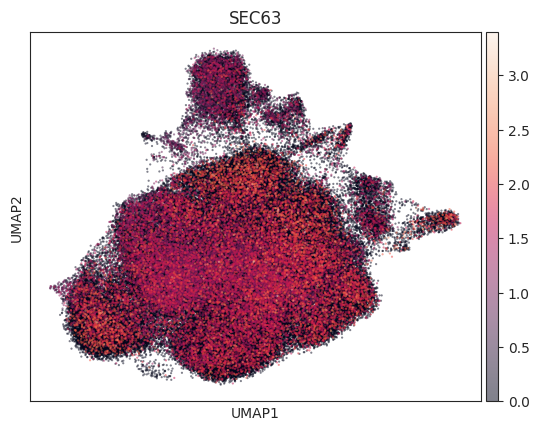

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


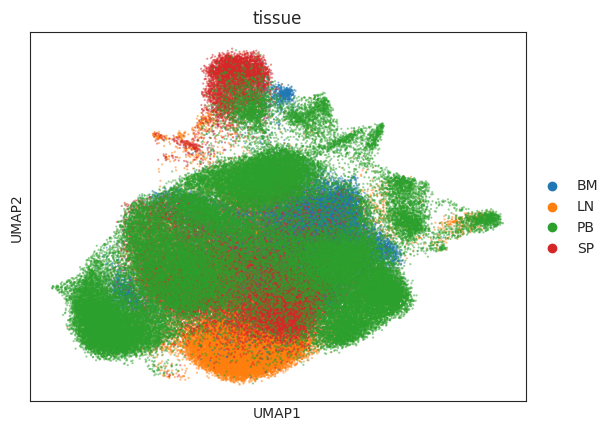

In [12]:
sc.pl.umap(adata, color = 'hypermutated', size = 10, alpha = 0.5)
sc.pl.umap(adata, color = 'celltypist', size = 10, alpha = 0.7)

sc.pl.umap(adata, color = 'SOX5', size = 10, alpha = 0.5)

sc.pl.umap(adata, color = 'EZR', size = 10, alpha = 0.5)
sc.pl.umap(adata, color = 'CD55', size = 10, alpha = 0.5)

sc.pl.umap(adata, color = 'SEC63', size = 10, alpha = 0.5)

sc.pl.umap(adata, color = 'tissue', size = 10, alpha = 0.5)

In [13]:
adata.obs.groupby('leiden').hypermutated.value_counts(normalize = True)


leiden  hypermutated
0       False           0.980663
        True            0.019337
1       False           0.990311
        True            0.009689
2       False           0.984696
        True            0.015304
3       False           0.964250
        True            0.035750
4       False           0.990749
        True            0.009251
5       False           0.956680
        True            0.043320
6       False           0.987208
        True            0.012792
7       False           0.955580
        True            0.044420
8       False           0.972222
        True            0.027778
9       False           0.960302
        True            0.039698
10      False           0.742112
        True            0.257888
11      False           0.971328
        True            0.028672
12      False           0.983835
        True            0.016165
13      False           0.910655
        True            0.089345
14      False           0.611032
        True          

In [15]:
adata.obs.groupby('leiden').hypermutated.value_counts(normalize = False)

leiden  hypermutated
0       False           15874
        True              313
1       False           14923
        True              146
2       False           13962
        True              217
3       False           13567
        True              503
4       False           13815
        True              129
5       False           11572
        True              524
6       False            9338
        True              121
7       False            8691
        True              404
8       False            8575
        True              245
9       False            8273
        True              342
10      False            5410
        True             1880
11      False            6335
        True              187
12      False            5782
        True               95
13      False            2487
        True              244
14      False             853
        True              543
15      False            1331
        True               25
16      False      

In [16]:
ad = adata[~adata.obs.celltypist.str.contains("Age")]

In [19]:
sc.tl.rank_genes_groups(ad, groupby='hypermutated')

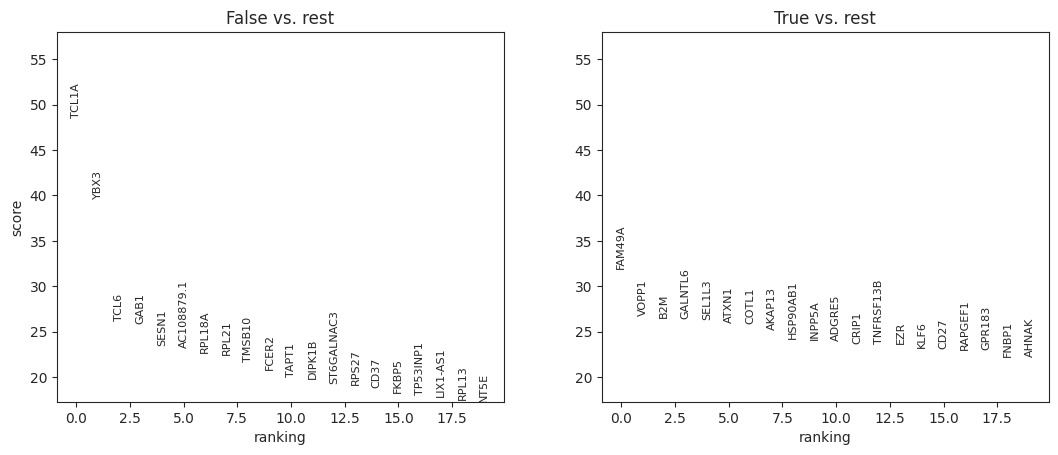

In [20]:
sc.pl.rank_genes_groups(ad)

In [21]:
ad

AnnData object with n_obs × n_vars = 141145 × 27218
    obs: 'donor', 'tissue', 'sample_uid', 'doublet_scores_counts', 'predicted_doublets_counts', 'doublet_scores_cellbender_counts', 'predicted_doublets_cellbender_counts', 'n_genes', 'n_counts', 'donor_tissue', '_scvi_batch', '_scvi_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Immune_All_Low_predicted_labels', 'Immune_All_Low_conf_score', 'Immune_All_High_predicted_labels', 'Immune_All_High_conf_score', 'majority_voting_low_predicted_labels', 'majority_voting_low_over_clustering', 'majority_voting_low_majority_voting', 'majority_voting_low_conf_score', 'leiden', 'correlation_cycling', 'anticorrelation_cycling', 'corr_cycling', 'anticorr_cycling', 'cycling', 'Majority_Voting_Result', 'majority_voting_doublet', 'rare_or_bad_q_cell', 't_cell_score', 'myeloid_score', 'possible_b_cell', 'probable_hq_single_b_cell', 'probable_hq_s

<Axes: xlabel='v_mismatch', ylabel='Proportion'>

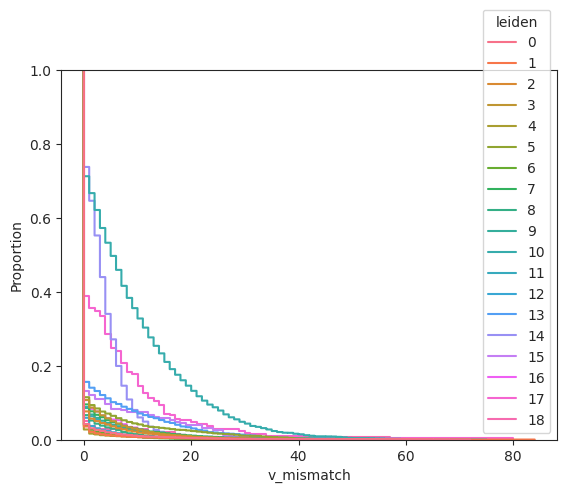

In [14]:
sns.ecdfplot(data = adata.obs, x = 'v_mismatch', hue = 'leiden', complementary=True)